## Code to download numerical-relativity data and the python library we need to read it

In [63]:
# Get romspline: library to read numerical relativity data
# Note: h5py is for the timing data, romspline is for the other data
# Must be run with a Python2 runtime
!rm -r ./romspline
!git clone https://bitbucket.org/chadgalley/romspline
import romspline
import h5py 

# Numpy and matplotlib
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rc('axes', labelsize=18)
matplotlib.rc('xtick', labelsize = 18)
matplotlib.rc('ytick', labelsize = 18)

# Get the numerical relativity data
! rm -r ./NRDataExample
!git clone https://github.com/geoffrey4444/NRDataExample.git

Cloning into 'romspline'...
remote: Counting objects: 451, done.
remote: Compressing objects: 100% (372/372), done.
remote: Total 451 (delta 251), reused 133 (delta 77)
Receiving objects: 100% (451/451), 2.52 MiB | 5.30 MiB/s, done.
Resolving deltas: 100% (251/251), done.
Cloning into 'NRDataExample'...
remote: Counting objects: 14, done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [8]:
!ls NRDataExample #list available data files

README.md	      SXS_BBH_0306_Res2.h5  SXS_BBH_306_Timing.h5
SXS_BBH_0306_Res0.h5  SXS_BBH_0306_Res3.h5
SXS_BBH_0306_Res1.h5  SXS_BBH_0306_Res4.h5


In [13]:
# Print the contents of a file
# Each file packs in A LOT of different data
f = h5py.File('./NRDataExample/SXS_BBH_0306_Res4.h5','r')
keys = f.keys()
print(keys)
f.close()

[u'CommonHorizonTimes', u'HorizonATimes', u'HorizonBTimes', u'LNhatx-vs-time', u'LNhaty-vs-time', u'LNhatz-vs-time', u'NRtimes', u'Omega-vs-time', u'amp_l2_m-1', u'amp_l2_m-2', u'amp_l2_m0', u'amp_l2_m1', u'amp_l2_m2', u'amp_l3_m-1', u'amp_l3_m-2', u'amp_l3_m-3', u'amp_l3_m0', u'amp_l3_m1', u'amp_l3_m2', u'amp_l3_m3', u'amp_l4_m-1', u'amp_l4_m-2', u'amp_l4_m-3', u'amp_l4_m-4', u'amp_l4_m0', u'amp_l4_m1', u'amp_l4_m2', u'amp_l4_m3', u'amp_l4_m4', u'amp_l5_m-1', u'amp_l5_m-2', u'amp_l5_m-3', u'amp_l5_m-4', u'amp_l5_m-5', u'amp_l5_m0', u'amp_l5_m1', u'amp_l5_m2', u'amp_l5_m3', u'amp_l5_m4', u'amp_l5_m5', u'amp_l6_m-1', u'amp_l6_m-2', u'amp_l6_m-3', u'amp_l6_m-4', u'amp_l6_m-5', u'amp_l6_m-6', u'amp_l6_m0', u'amp_l6_m1', u'amp_l6_m2', u'amp_l6_m3', u'amp_l6_m4', u'amp_l6_m5', u'amp_l6_m6', u'amp_l7_m-1', u'amp_l7_m-2', u'amp_l7_m-3', u'amp_l7_m-4', u'amp_l7_m-5', u'amp_l7_m-6', u'amp_l7_m-7', u'amp_l7_m0', u'amp_l7_m1', u'amp_l7_m2', u'amp_l7_m3', u'amp_l7_m4', u'amp_l7_m5', u'amp_l7_m6', 

## Look at calculations about the black holes

In [0]:
# Let's look at some results from the calculation
# How did the black holes move?
position1x = romspline.readSpline('./NRDataExample/SXS_BBH_0306_Res4.h5', group='position1x-vs-time')
position1y = romspline.readSpline('./NRDataExample/SXS_BBH_0306_Res4.h5', group='position1y-vs-time')
position2x = romspline.readSpline('./NRDataExample/SXS_BBH_0306_Res4.h5', group='position2x-vs-time')
position2y = romspline.readSpline('./NRDataExample/SXS_BBH_0306_Res4.h5', group='position2y-vs-time')

In [0]:
# Get the start and ending time for the data
# Then make a nice list of times where we will evaluate the data
tmin = position1x.X[0]
tmax = position1x.X[-1]
timesToPlot = np.arange(tmin,tmax,1)

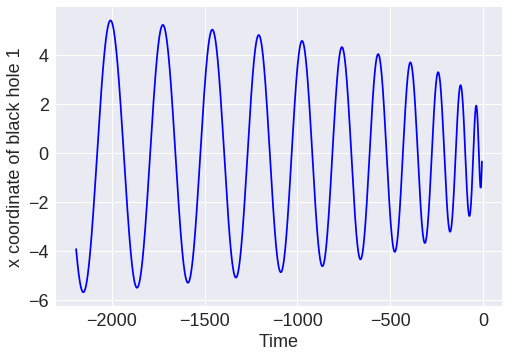

In [27]:
# Plot x(t)
plt.clf()
plt.plot(timesToPlot, position1x(timesToPlot), color='blue')
plt.xlabel('Time')
plt.ylabel('x coordinate of black hole 1')
plt.show()

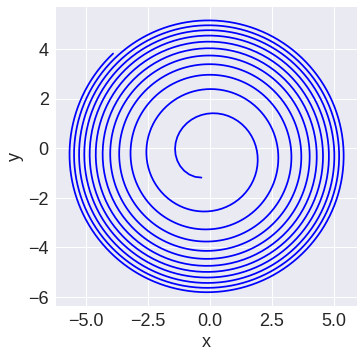

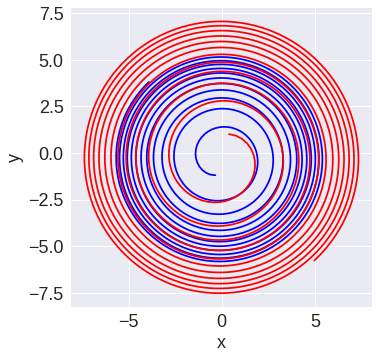

In [77]:
# Plot the orbit
plt.clf()
plt.plot(position1x(timesToPlot), position1y(timesToPlot), color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.axes().set_aspect('equal')
plt.show()

# CHALLENGE: also plot the orbit of the second black hole on the same graph
# Why does it look the way it does?
# Compare to orbit of Pluto and its moon Charon: https://www.youtube.com/watch?v=E4_SDErAQRE
plt.clf()
plt.plot(position1x(timesToPlot), position1y(timesToPlot), color='blue')
plt.plot(position2x(timesToPlot), position2y(timesToPlot), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.axes().set_aspect('equal')
plt.show()

### Mass vs. time

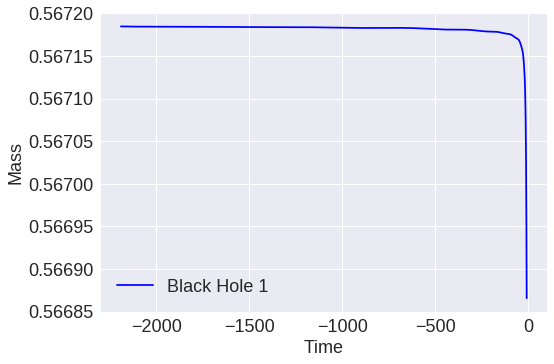

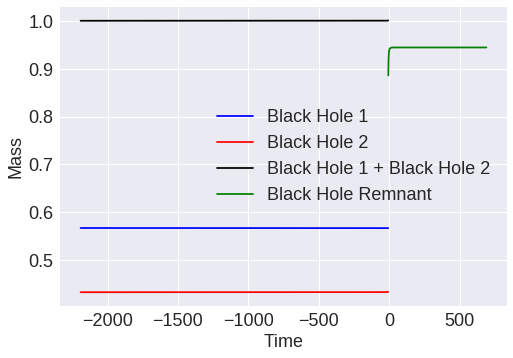

In [83]:
# Let's look at the mass of the bigger black hole vs time
mass1 = romspline.readSpline('./NRDataExample/SXS_BBH_0306_Res4.h5', group='mass1-vs-time')
mass2 = romspline.readSpline('./NRDataExample/SXS_BBH_0306_Res4.h5', group='mass2-vs-time')
massRemnant = romspline.readSpline('./NRDataExample/SXS_BBH_0306_Res4.h5', group='remnant-mass-vs-time')
times12 = np.arange(mass1.X[0], mass1.X[-1], 0.5)
timesRemnant = np.arange(massRemnant.X[0], massRemnant.X[-1], 0.5)

plt.clf()
plt.plot(times12, mass1(times12), color='blue', label='Black Hole 1')
plt.legend(loc='best', fontsize=18)
plt.xlabel('Time')
plt.ylabel('Mass')
plt.show()

# CHALLENGE: look at mass1-vs-time, mass2-vs-time, mass1-vs-time + mass2-vs-time (total mass), and remnant-mass-vs-time on the same graph
# Compare the total mass of the two holes vs. the total mass of the remnant
plt.clf()
plt.plot(times12, mass1(times12), color='blue', label='Black Hole 1')
plt.plot(times12, mass2(times12), color='red', label='Black Hole 2')
plt.plot(times12, mass1(times12)+mass2(times12), color='black', label='Black Hole 1 + Black Hole 2')
plt.plot(timesRemnant, massRemnant(timesRemnant), color='green', label='Black Hole Remnant')
plt.legend(loc='best', fontsize=18)
plt.xlabel('Time')
plt.ylabel('Mass')
plt.show()


### Gravitational waves emitted

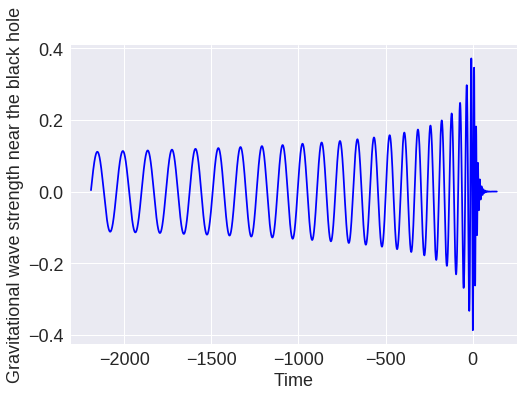

In [76]:
# Here's a simple function that tells you the dominant contribution to the gravitational waves emitted (there are smaller corrections we ignore here)
amp22 = romspline.readSpline('./NRDataExample/SXS_BBH_0306_Res4.h5', group='amp_l2_m2')
phase22 = romspline.readSpline('./NRDataExample/SXS_BBH_0306_Res4.h5', group='phase_l2_m2')
waveTimeToPlot = np.arange(amp22.X[0],amp22.X[-1],0.1)
plt.clf()
plt.plot(waveTimeToPlot, amp22(waveTimeToPlot)*np.cos(phase22(waveTimeToPlot)), color='blue')
#plt.plot(timesToPlot, mass2(timesToPlot), color='red', label='Black Hole 2')
plt.xlabel('Time')
plt.ylabel('Gravitational wave strength near the black hole')
plt.show()

## Resolution vs. precision/"accuracy" and time

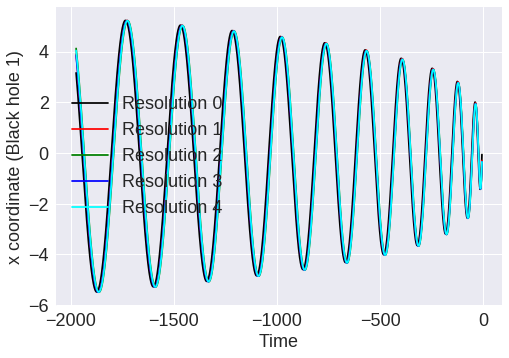

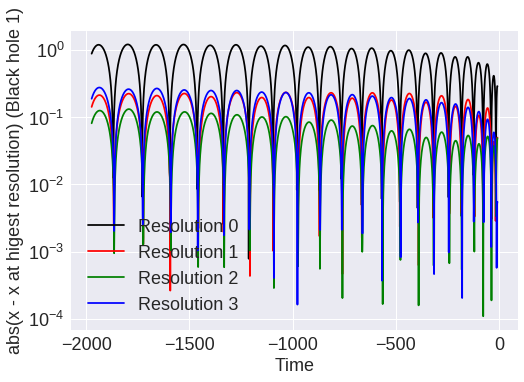

In [49]:
# Let's compare the position x(t) at different resolutions
# First, read in each data file
xDataList = []
startTimeList = []
endTimeList = []
resolutions = [0,1,2,3,4]
colors = ['black', 'red', 'green', 'blue', 'cyan']

for res in resolutions:
    position1x = romspline.readSpline('./NRDataExample/SXS_BBH_0306_Res'+str(res)+'.h5', group='position1x-vs-time')
    xDataList.append(position1x)
    startTimeList.append(position1x.X[0])
    endTimeList.append(position1x.X[-1])

# Choose times to plot between the largest start time and smallest end time
resTimesToPlot = np.arange(max(startTimeList), min(endTimeList), 1)

# Plot x(t) for each resolution
plt.clf()
for res in resolutions:
    plt.plot(resTimesToPlot, xDataList[res](resTimesToPlot), color=colors[res], label="Resolution "+str(res))
plt.legend(loc='best', fontsize=18)
plt.xlabel('Time')
plt.ylabel('x coordinate (Black hole 1)')
plt.show()

# CHALLENGE: plot absolute value of differences from the highest resolution instead
# Set the y scale to log
plt.clf()
resolutionsExceptHighest = [0,1,2,3]
for res in resolutionsExceptHighest:
    #REPLACE THE NEXT LINE WITH YOUR CODE
    #plt.plot(resTimesToPlot, xDataList[res](resTimesToPlot), color=colors[res], label="Resolution "+str(res))
    plt.plot(resTimesToPlot, abs(xDataList[res](resTimesToPlot)-xDataList[-1](resTimesToPlot)), color=colors[res], label="Resolution "+str(res))
plt.legend(loc='best', fontsize=18)
plt.xlabel('Time')
# INSERT A LINE TO MAKE THE Y AXIS LOG SCALE
plt.yscale('log')
plt.ylabel('abs(x - x at higest resolution) (Black hole 1)')
plt.show()

In [64]:
# Now, how long did each resolution take to run?
timingFile = h5py.File('./NRDataExample/SXS_BBH_306_Timing.h5')
print(timingFile.keys())
print(timingFile['Lev4'].keys())

[u'Lev0', u'Lev1', u'Lev2', u'Lev3', u'Lev4']
[u'CodeTime.dat', u'CoreHours.dat', u'NumberOfCores.dat', u'WallTime.dat']


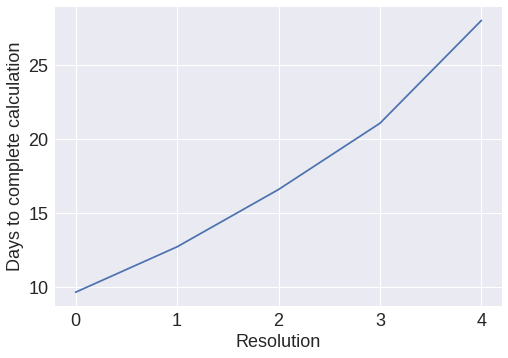

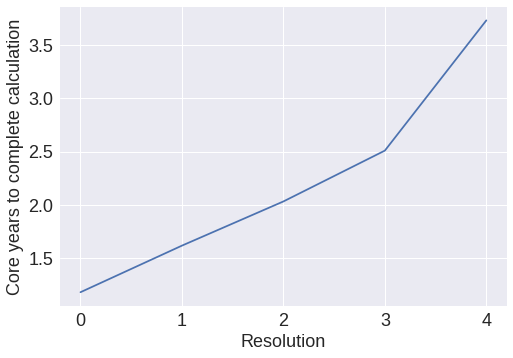

In [71]:
# How much time did the job take? How much time would it have taken on a single core?
resolutions = [0,1,2,3,4]
wallTimesList = []
coreHoursList = []
for res in resolutions:
    wallTimesList.append(timingFile['Lev'+str(res)]['WallTime.dat'][-1])
    coreHoursList.append(timingFile['Lev'+str(res)]['CoreHours.dat'][-1])
    
plt.clf()
plt.plot(resolutions, np.array(wallTimesList)/24)
plt.xlabel('Resolution')
plt.ylabel('Days to complete calculation')
plt.show()

plt.clf()
plt.plot(resolutions, np.array(coreHoursList)/(24*365.25))
plt.xlabel('Resolution')
plt.ylabel('Core years to complete calculation')
plt.show()